In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1)

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [2]:
df = pd.read_csv("Breast_Cancer (1).csv")
print(df.shape)
df.head

(4024, 16)


<bound method NDFrame.head of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        

In [3]:
# checking for null values
df.isnull().sum()

# we don't have any null values . Therefore Data Cleaning is not necessary

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

<Axes: >

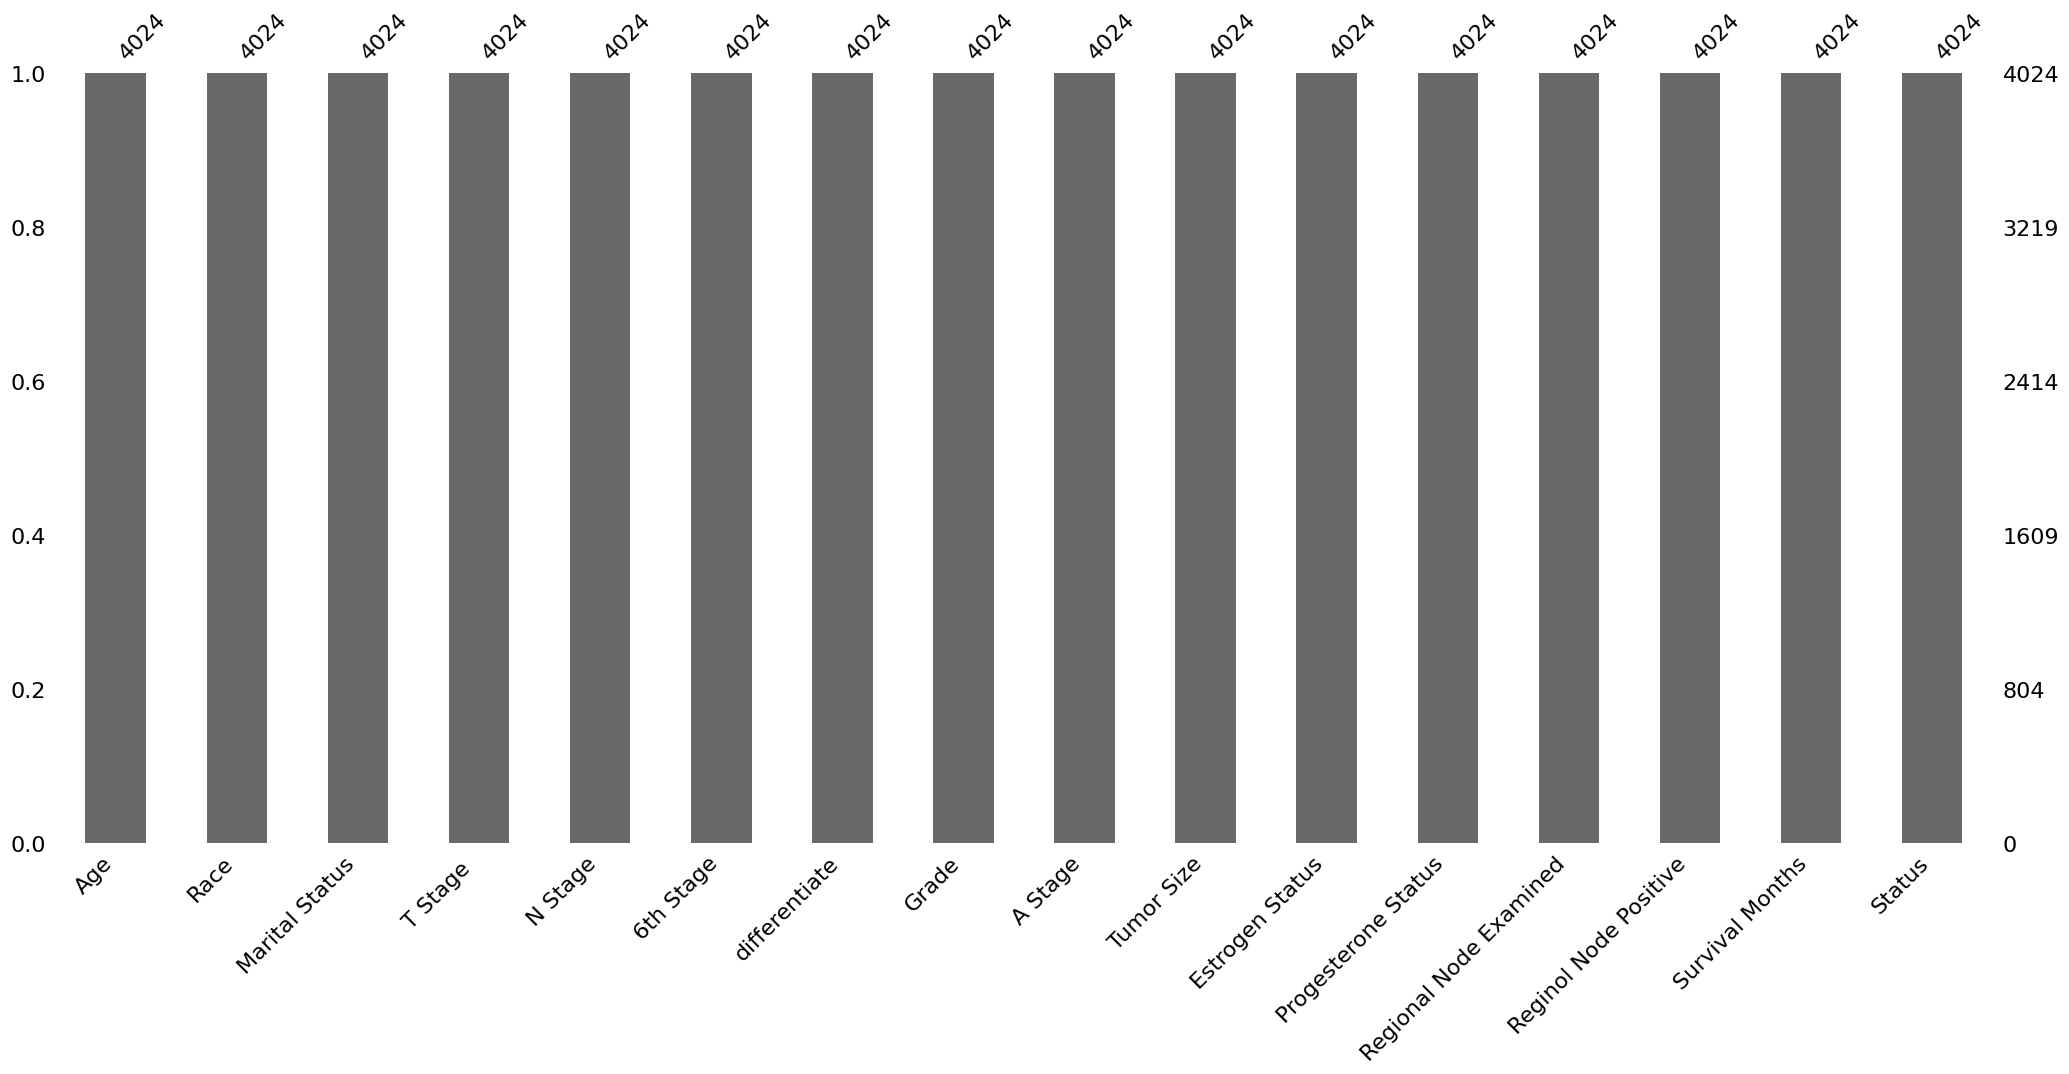

In [4]:
msno.bar(df)

In [5]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [7]:
# Number of unique columns
uni_col = df.columns.nunique()

# Number of unique rows
uni_row = df.nunique(axis=0)

print(f"Number of unique columns: {uni_col}")
print(f"Number of unique rows: {uni_row}")


Number of unique columns: 16
Number of unique rows: Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64


In [8]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [9]:
### ------------  ENCODING   ----------------
  

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# List of columns you want to encode
columns_to_encode = ['T Stage ', '6th Stage', 'N Stage', 'Race', 'differentiate', 'Marital Status', 'Grade', 'A Stage','Estrogen Status','Progesterone Status','Status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the updated DataFrame
print(df.head())


   Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0   68     2               1         0        0          0              1   
1   50     2               1         1        1          2              0   
2   58     2               0         2        2          4              0   
3   58     2               1         0        0          0              1   
4   47     2               1         1        0          1              1   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          63                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24         

In [10]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


<Axes: >

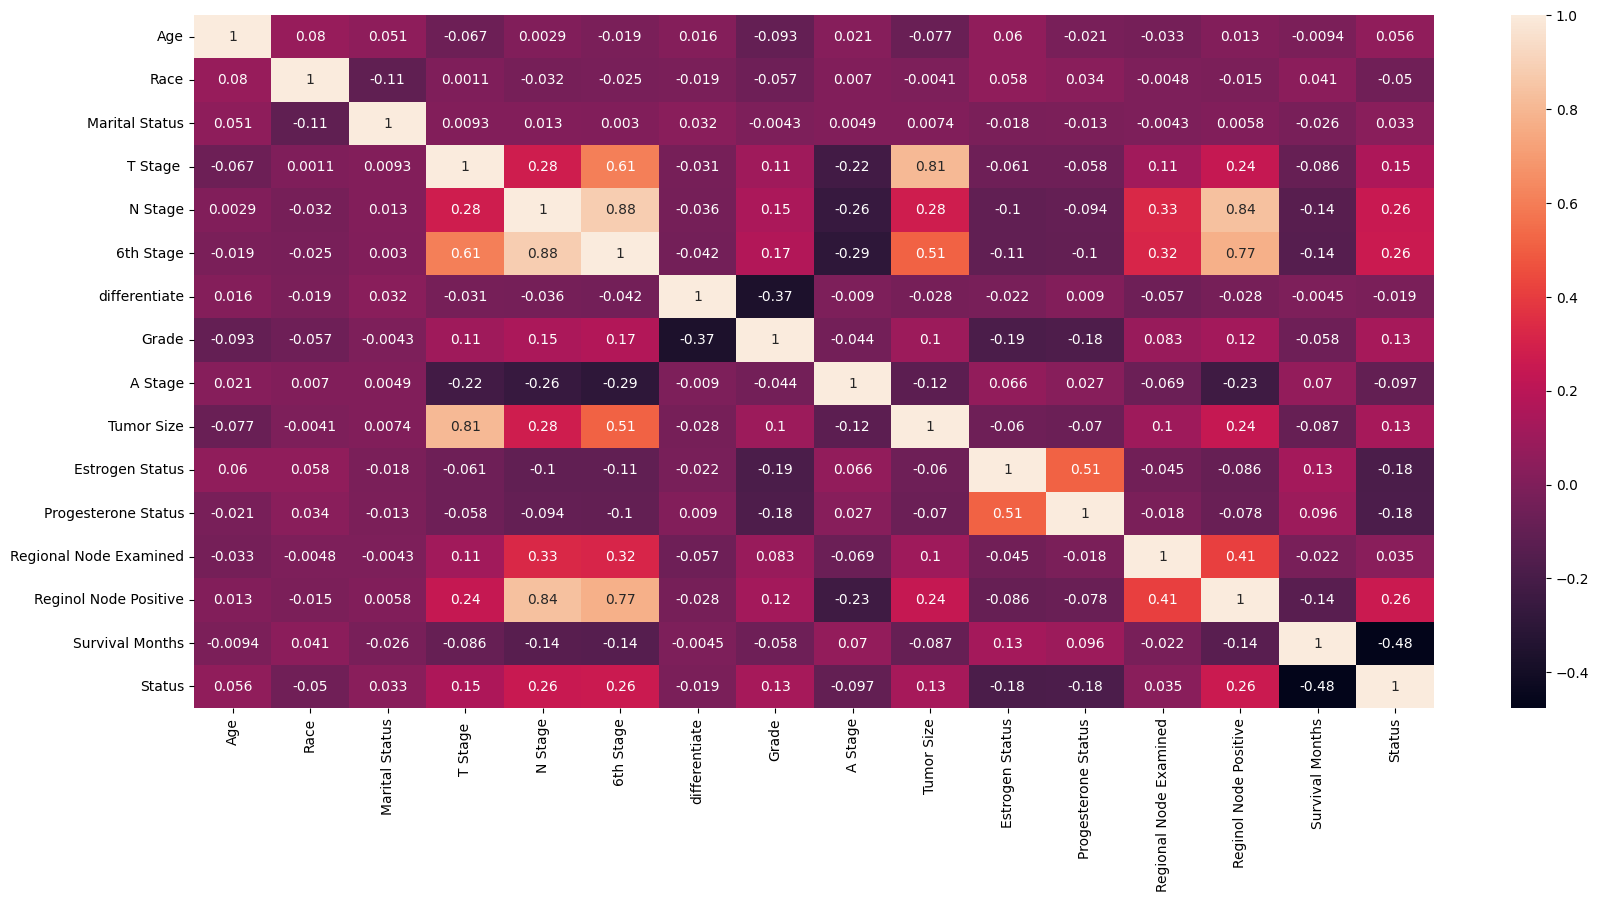

In [11]:
###  -----------   CORRELATION MATRIX ------------

corematrix = df.corr()
round(corematrix,2)
plt.figure(figsize=(20,9))
sns.heatmap(corematrix, annot=True)

In [12]:
# Print all column names to check
print(df.columns)


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [13]:
###  ---------- FEATURE IMPORTANCE   ----   CHI SQUARE METHOD 


# AIM 1

# perform chi- square test for feature importance on Survival Months

import pandas as pd
from scipy.stats import chi2_contingency


# Assuming df is your DataFrame and 'Survival Months' is your target variable

# List of categorical columns (excluding 'Survival Months')
categorical_columns = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Status']  # Replace with your column names

# Dictionary to hold p-values
p_values = {}

for col in categorical_columns:
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col], df['Survival Months'])

    # Performing the Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Storing the p-value for the feature
    p_values[col] = p

# Sorting features by their p-value
sorted_p_values = {k: v for k, v in sorted(p_values.items(), key=lambda item: item[1])}

# Display sorted features by importance
sorted_p_values
 

{'Status': 2.918381381478425e-256,
 'Reginol Node Positive': 1.561436823405662e-44,
 'Estrogen Status': 1.4026773281296729e-37,
 'Progesterone Status': 5.31156544550953e-17,
 'N Stage': 1.0615418482481658e-12,
 '6th Stage': 1.0151439953121984e-09,
 'A Stage': 4.779031340070837e-08,
 'Age': 0.0004978989157270709,
 'T Stage ': 0.0010419135473743824,
 'Race': 0.0013869900114595725,
 'differentiate': 0.0024394332766705376,
 'Grade': 0.0024394332766705376,
 'Marital Status': 0.01795750858848061,
 'Tumor Size': 0.1233935040730144,
 'Regional Node Examined': 0.835549865680798}

In [14]:
#Aim 1
#split into X/y
# IMPACT ON SURVIVAL MONTHS
# We dont do with survival months because each survival month has atmost one or 2 incidence, so wont be of much significance.
# It is the reason behind the most accuracy 
from sklearn.linear_model import LinearRegression
X = df[['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status','Reginol Node Positive', 'Status']]
y = df["Survival Months"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

#Building machine learning model 
model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2909335352181548

In [15]:
# perform chi- square test for feature importance on Status

import pandas as pd
from scipy.stats import chi2_contingency


# Assuming df is your DataFrame and 'Status' is your target variable

# List of categorical columns (excluding 'Status')
categorical_columns = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']  # Replace with your column names

# Dictionary to hold p-values
p_values = {}

for col in categorical_columns:
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col], df['Status'])

    # Performing the Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Storing the p-value for the feature
    p_values[col] = p

# Sorting features by their p-value
sorted_p_values = {k: v for k, v in sorted(p_values.items(), key=lambda item: item[1])}

# Display sorted features by importance
sorted_p_values
 

{'Survival Months': 2.918381381477759e-256,
 '6th Stage': 9.830332296203994e-60,
 'N Stage': 2.430140625217663e-59,
 'Reginol Node Positive': 2.2926910134541016e-51,
 'Estrogen Status': 3.0526081181489177e-31,
 'Progesterone Status': 5.392079685518964e-29,
 'differentiate': 3.0913516733336542e-24,
 'Grade': 3.0913516733336542e-24,
 'T Stage ': 2.7790953099786567e-22,
 'A Stage': 2.2264262284984456e-09,
 'Race': 8.440928800112451e-07,
 'Tumor Size': 1.5603950964555923e-06,
 'Marital Status': 1.1027694804532703e-05,
 'Age': 1.880215544112303e-05,
 'Regional Node Examined': 0.045010588788791626}

In [16]:
#Aim 2
#split into X/y
X = df[['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']]
y = df["Status"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

#Building machine learning model 
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8472049689440994

,Cols,Coef,CumSum
0,Survival Months,38.0,38.0
1,Age,12.0,50.0
2,Tumor Size,10.0,60.0
3,Regional Node Examined,10.0,70.0
4,Reginol Node Positive,8.0,78.0
5,Marital Status,4.0,82.0
6,N Stage,3.0,85.0
7,6th Stage,3.0,88.0
8,Race,2.0,90.0
9,T Stage,2.0,92.0


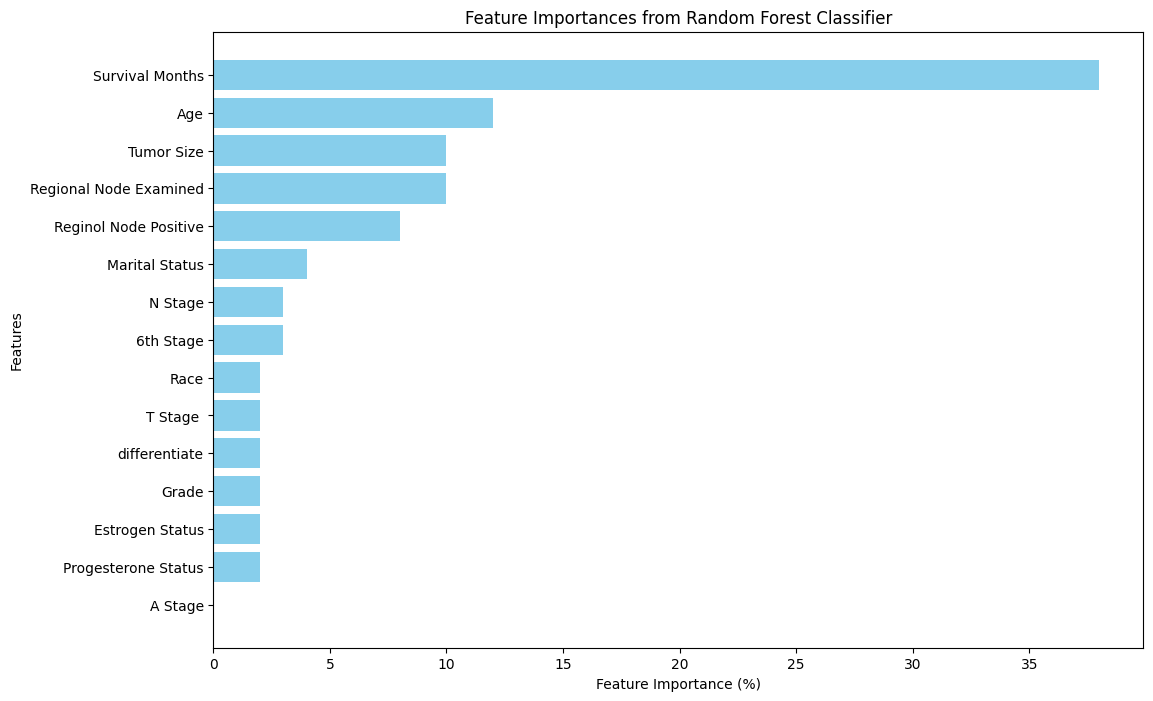

In [17]:
### FEATURE IMPORTANCE ---------------    METHOD 2
###  FEATURE IMPORTANCE DERIVED FROM RANDOM FOREST CLASSIFIER 

RF_fit = RandomForestClassifier()
RF_fit.fit(X_train,y_train)

Coef_ = pd.DataFrame(X_train.columns, RF_fit.feature_importances_).reset_index()
Coef_.columns  = ['Coef', 'Cols']
Coef_['Coef'] = round(Coef_.Coef*100, )
Coef_ = Coef_[['Cols', 'Coef']].sort_values('Coef', ascending = False)
Coef_['CumSum'] = round(Coef_.Coef.cumsum())
Coef_ = Coef_.reset_index().drop('index', axis = 1)
display(Coef_)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(Coef_['Cols'], Coef_['Coef'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()




Accuracy: 	 0.7627329192546584
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       686
           1       0.21      0.23      0.22       119

    accuracy                           0.76       805
   macro avg       0.54      0.54      0.54       805
weighted avg       0.77      0.76      0.77       805

Confusin Matrix: 
 [[587  99]
 [ 92  27]]


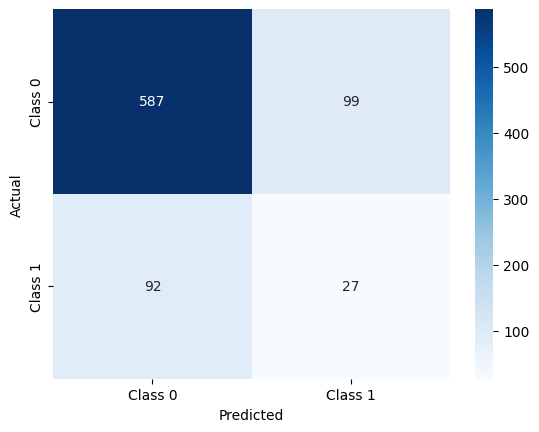

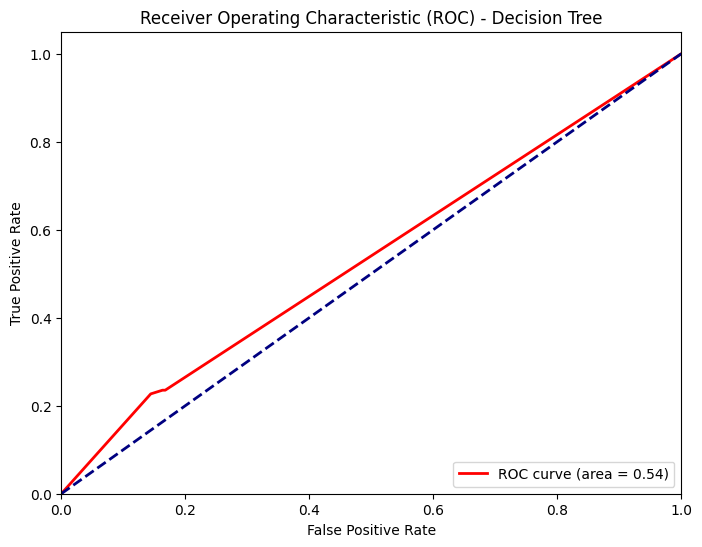

In [18]:

#----------------    DECISION TREE CLASSIFIER MODEL -------------

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a list of column names that you want to consider
columns_consider = ["Age", "Race", "N Stage",
       "differentiate", "Grade", "A Stage", "Tumor Size", "Reginol Node Positive"]

# Model building using DECISION TREE
dtc = DecisionTreeClassifier(random_state = 606)
dtc.fit(X_train[columns_consider], y_train)
y_pred_dt= dtc.predict(X_test[columns_consider])

# calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_dt))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# ROC for decision tree classifier
dtc = DecisionTreeClassifier(random_state=606)
dtc.fit(X_train[columns_consider], y_train)

y_scores_dt = dtc.predict_proba(X_test[columns_consider])[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()


Accuracy: 	 0.831055900621118
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       686
           1       0.33      0.13      0.19       119

    accuracy                           0.83       805
   macro avg       0.60      0.54      0.55       805
weighted avg       0.78      0.83      0.80       805

Confusin Matrix: 
 [[653  33]
 [103  16]]


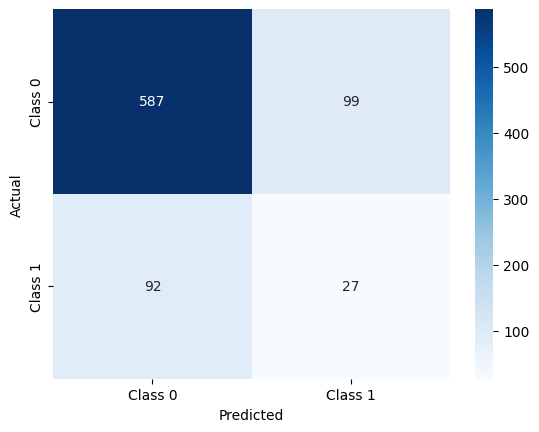

In [19]:

#--------------------------  XBBOOST CLASSIFIER MODEL  --------------------------------

# Model building using XGBOOST
columns_required=columns_consider
xgbc = xgb.XGBClassifier(random_state = 606)
xgbc.fit(X_train[columns_required], y_train)
y_pred_xg= xgbc.predict(X_test[columns_required])

#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_xg))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC for XG Boost classifier
y_pred_xg = xgbc.predict_proba(X_test[columns_required])[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_xg)
roc_auc = auc(fpr, tpr)

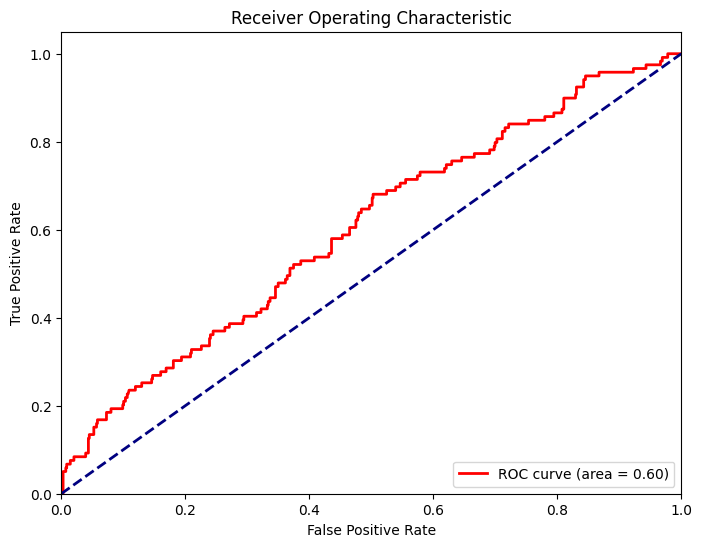

In [20]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 	 0.8298136645962733
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       686
           1       0.30      0.11      0.16       119

    accuracy                           0.83       805
   macro avg       0.58      0.53      0.53       805
weighted avg       0.78      0.83      0.80       805

Confusin Matrix: 
 [[655  31]
 [106  13]]


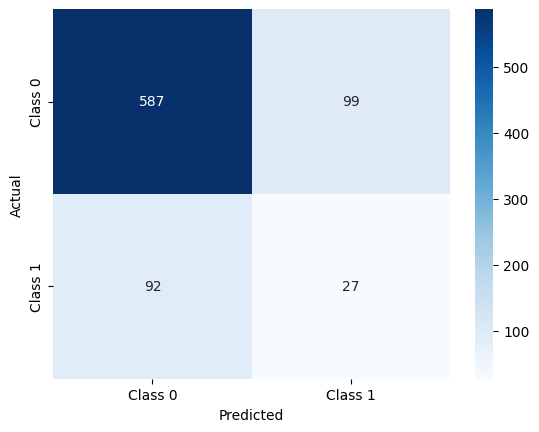

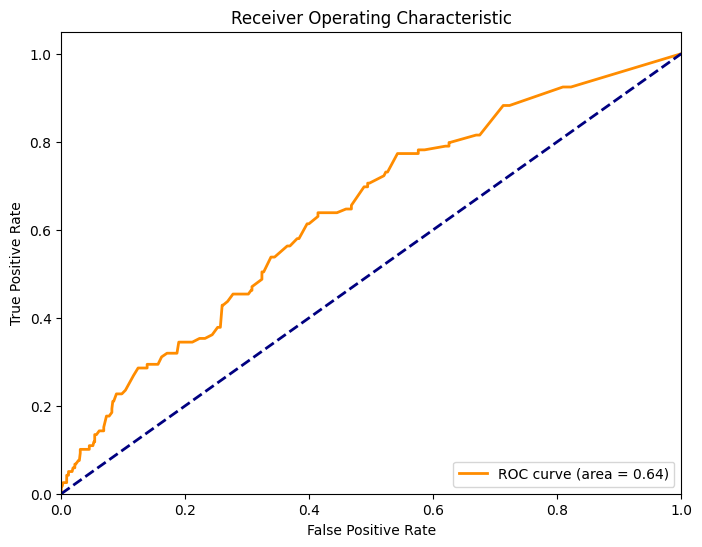

In [21]:
# Model building using RANDOMFOREST
rfc = RandomForestClassifier(random_state = 606)
rfc.fit(X_train[columns_required], y_train)
y_pred= rfc.predict(X_test[columns_required])
print("Accuracy: \t",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC for Random Forest Classifier

rfc = RandomForestClassifier(random_state = 606)
rfc.fit(X_train[columns_required], y_train)
y_pred = rfc.predict(X_test[columns_required])

y_pred_prob = rfc.predict_proba(X_test[columns_required])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Accuracy: 	 0.84472049689441
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       686
           1       0.38      0.08      0.13       119

    accuracy                           0.84       805
   macro avg       0.62      0.53      0.52       805
weighted avg       0.79      0.84      0.80       805

Confusin Matrix: 
 [[671  15]
 [110   9]]


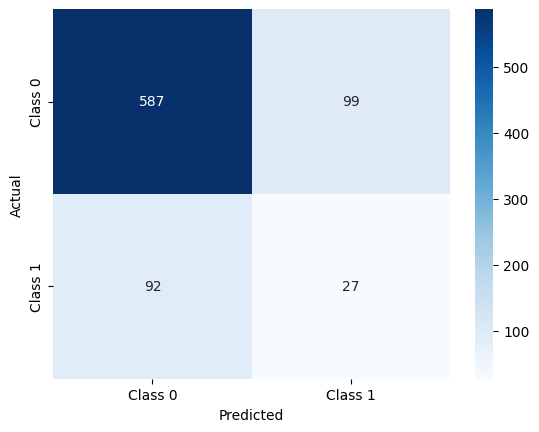

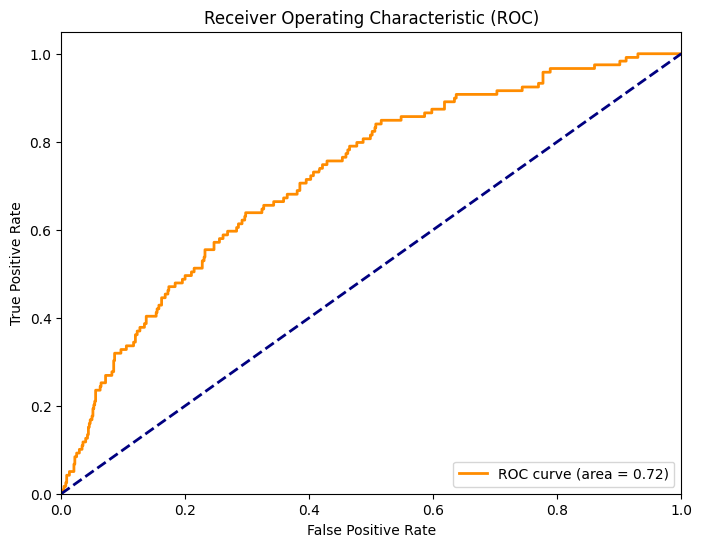

In [22]:
# Model building using Logistic Regression
lrc = LogisticRegression()
lrc.fit(X_train[columns_required], y_train)
y_pred_lr= lrc.predict(X_test[columns_required])


#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_lr))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC FOR LOGISTIC REGRESSION

y_pred_prob = lrc.predict_proba(X_test[columns_required])[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

Accuracy: 	 0.8335403726708075
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       686
           1       0.31      0.10      0.15       119

    accuracy                           0.83       805
   macro avg       0.58      0.53      0.53       805
weighted avg       0.78      0.83      0.80       805

Confusin Matrix: 
 [[659  27]
 [107  12]]


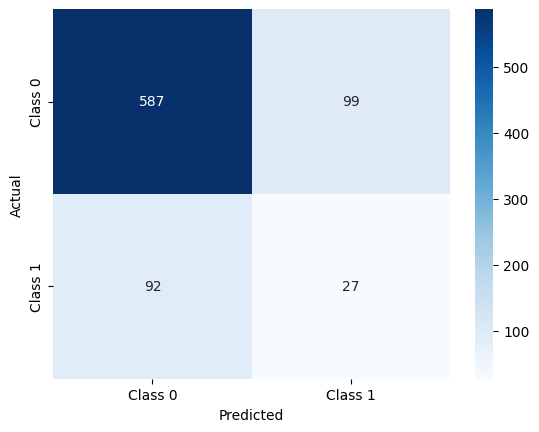

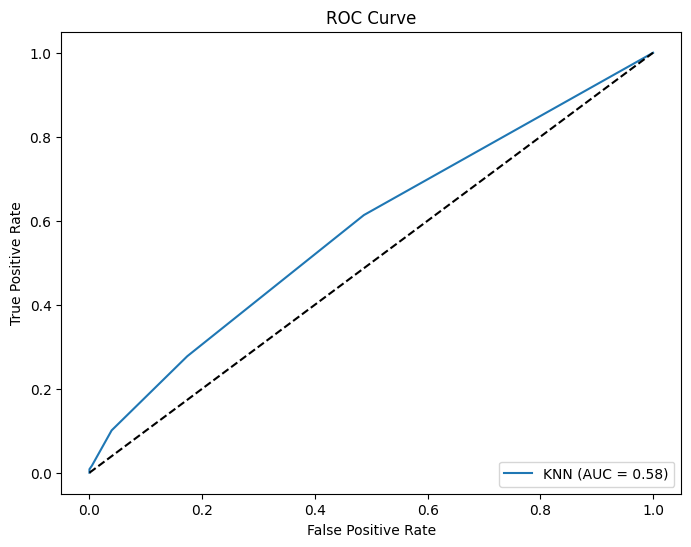

In [23]:
# Model building using KNN Classifier
knc = KNeighborsClassifier( metric='minkowski')
knc.fit(X_train[columns_required], y_train)
y_pred_knc= knc.predict(X_test[columns_required])
#Calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_knc))
print(classification_report(y_test, y_pred_knc))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_knc))

# Visual Representation of confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_pred_prob_knc = knc.predict_proba(X_test[columns_required])[:, 1]

# Calculate ROC Curve
fpr_knc, tpr_knc, thresholds_knc = roc_curve(y_test, y_pred_prob_knc)

# Calculate AUC (Area under the ROC Curve)
auc_knc = auc(fpr_knc, tpr_knc)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knc, tpr_knc, label=f'KNN (AUC = {auc_knc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

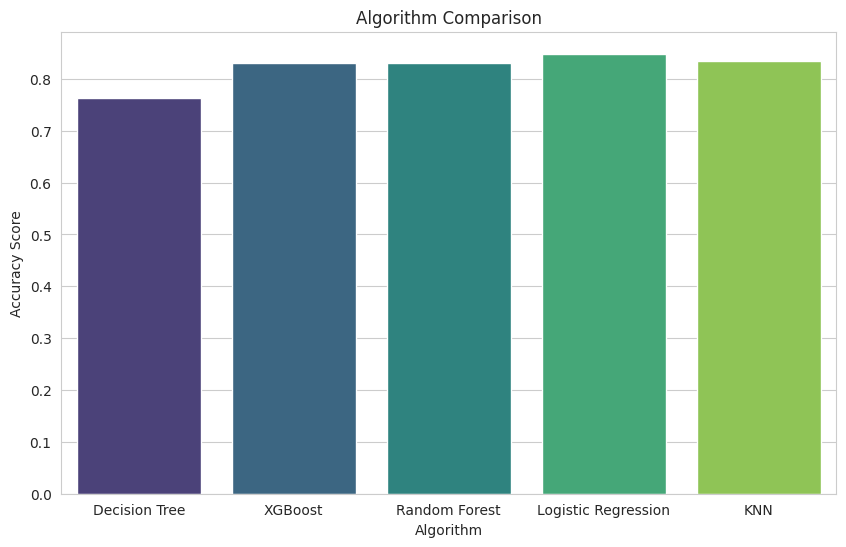

In [24]:
# Assuming X_train, X_test, y_train, y_test are already defined and 'columns_consider' is your list of features

# Decision Tree
dtc = DecisionTreeClassifier(random_state=606)
dtc.fit(X_train[columns_consider], y_train)
y_pred_dt = dtc.predict(X_test[columns_consider])
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# XGBoost
xgbc = xgb.XGBClassifier(random_state=606)
xgbc.fit(X_train[columns_consider], y_train)
y_pred_xg = xgbc.predict(X_test[columns_consider])
accuracy_xgb = accuracy_score(y_test, y_pred_xg)

# Random Forest
rfc = RandomForestClassifier(random_state=606)
rfc.fit(X_train[columns_consider], y_train)
y_pred_rf = rfc.predict(X_test[columns_consider])
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_consider])
X_test_scaled = scaler.transform(X_test[columns_consider])

lrc = LogisticRegression()
lrc.fit(X_train_scaled, y_train)
y_pred_lr = lrc.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# KNN Classifier
knc = KNeighborsClassifier(metric='minkowski')
knc.fit(X_train_scaled, y_train)
y_pred_knc = knc.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knc)

# Create a dictionary of accuracy scores
accuracy_scores = {
    'Decision Tree': accuracy_dt,
    'XGBoost': accuracy_xgb,
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lr,
    'KNN': accuracy_knn
}

# Convert dictionary to lists for plotting
algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=scores, palette="viridis")

# Adding the aesthetics
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()


In [25]:
##-------------- PERFORM T TEST -------------------------
##----- CHECKING THE MEAN DIFFERENCE BETWEEN STATUS AND EACH COLUMN , IF THEY ARE SIGNIFICANTLY DIFFERENT. 
##  IF P<0.05 , THERE IS A RELATION 


import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame and it includes 'Status' and columns in 'columns_consider'
columns_consider = ["Age", "Race", "T Stage ", "N Stage", "6th Stage", 
                    "differentiate", "Grade", "A Stage", "Tumor Size", "Estrogen Status", 
                    "Progesterone Status"]
group1_value = 0  
group2_value = 1  

t_test_results = []

for column in columns_consider:
    # Perform t-test for each numeric column
    group1 = df[df['Status'] == group1_value][column]
    group2 = df[df['Status'] == group2_value][column]

    # Check if the column is numeric before performing t-test
    if pd.api.types.is_numeric_dtype(df[column]):
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
        t_test_results.append({'Feature': column, 'T-Statistic': t_stat, 'P-Value': p_value})
    else:
        print(f"Skipped t-test for {column} as it is not numeric.")

# Create DataFrame from the list of results
t_test_results_df = pd.DataFrame(t_test_results)
print(t_test_results_df)

                Feature  T-Statistic       P-Value
0                   Age    -3.322896  9.309078e-04
1                  Race     2.760770  5.903773e-03
2              T Stage     -9.129611  5.520297e-19
3               N Stage   -13.796728  9.931253e-39
4             6th Stage   -14.834571  5.296667e-44
5         differentiate     1.416397  1.569583e-01
6                 Grade    -8.319897  3.593153e-16
7               A Stage     4.180761  3.282492e-05
8            Tumor Size    -7.626535  7.019568e-14
9       Estrogen Status     8.128191  2.036183e-15
10  Progesterone Status     9.351384  9.918444e-20


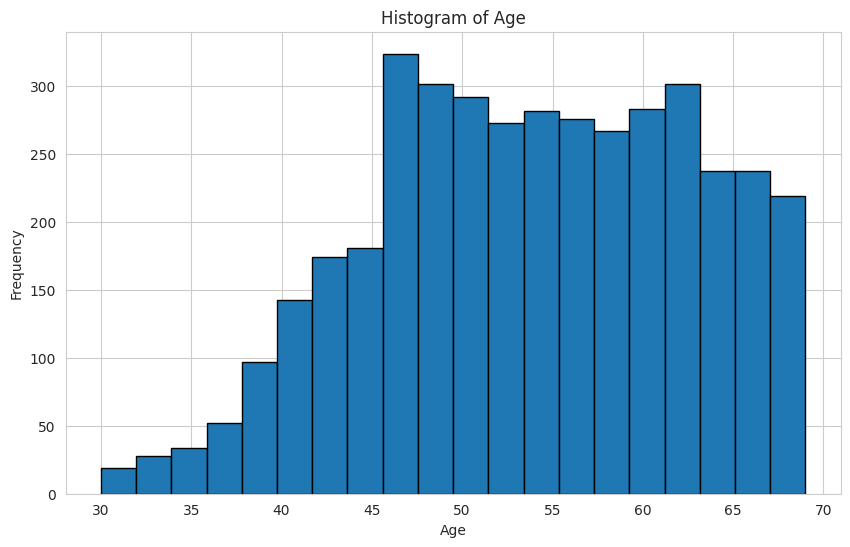

In [26]:
### -------------  Visualizaztions -------------------

##   Distribution of People Age in the Data
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file into a DataFrame
data = pd.read_csv('Breast_Cancer (1).csv')

# Assuming your DataFrame has a column 'Age'
plt.figure(figsize=(10, 6))

# Create a histogram for the 'Age' column with 20 bins and black edge color
plt.hist(data['Age'], bins=20, edgecolor='black')

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()



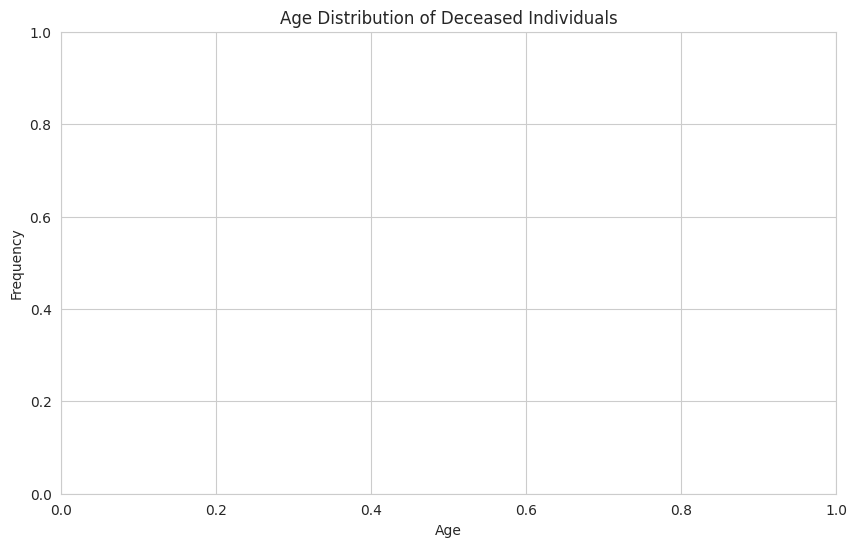

In [27]:


###  ---------- Age Distribution of Breast Cancer Deceased ----------------- 

# Assuming your DataFrame is named 'data', 'Age' is the age column, and 'Status' is the status column
# Let's assume '1' in 'Status' indicates death

# Filter the DataFrame for individuals who died
deceased = data[data['Status'] == 1]

plt.figure(figsize=(10, 6))

# Create a histogram for the 'Age' of deceased individuals
sns.histplot(deceased['Age'], bins=20, kde=False, color='red')

# Add title and labels
plt.title('Age Distribution of Deceased Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


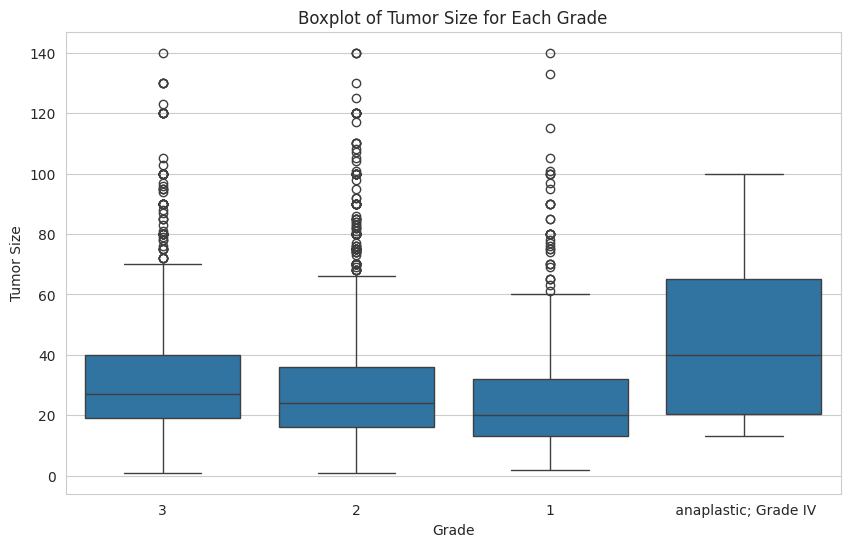

In [28]:
# Visualization codes

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Grade', y='Tumor Size')
plt.title('Boxplot of Tumor Size for Each Grade')
plt.xlabel('Grade')
plt.ylabel('Tumor Size')
plt.show()


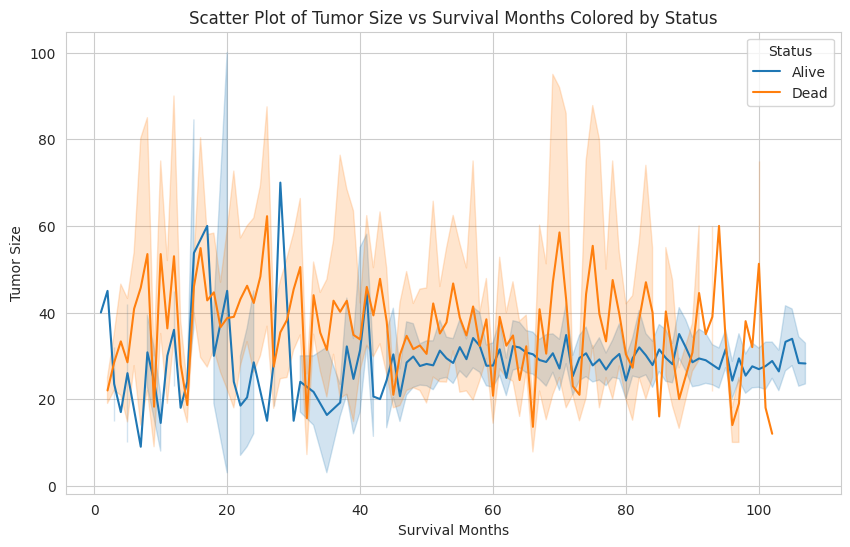

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Survival Months', y='Tumor Size', hue='Status')
plt.title('Scatter Plot of Tumor Size vs Survival Months Colored by Status')
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.show()


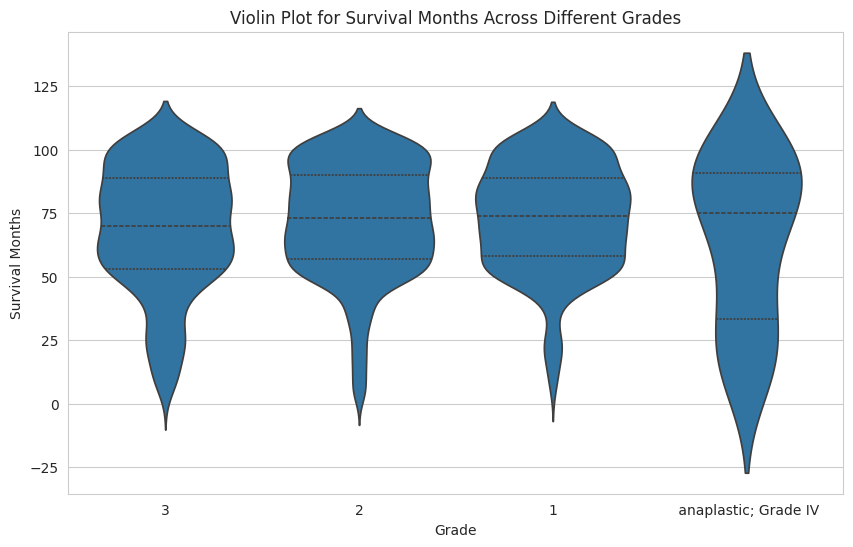

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Grade', y='Survival Months', inner='quartile')
plt.title('Violin Plot for Survival Months Across Different Grades')
plt.xlabel('Grade')
plt.ylabel('Survival Months')
plt.show()


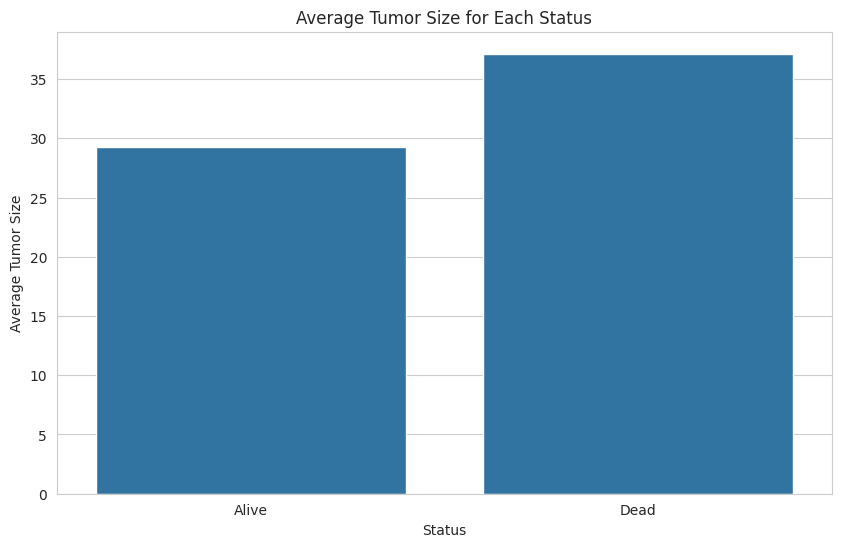

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Status', y='Tumor Size', ci=None)
plt.title('Average Tumor Size for Each Status')
plt.xlabel('Status')
plt.ylabel('Average Tumor Size')
plt.show()


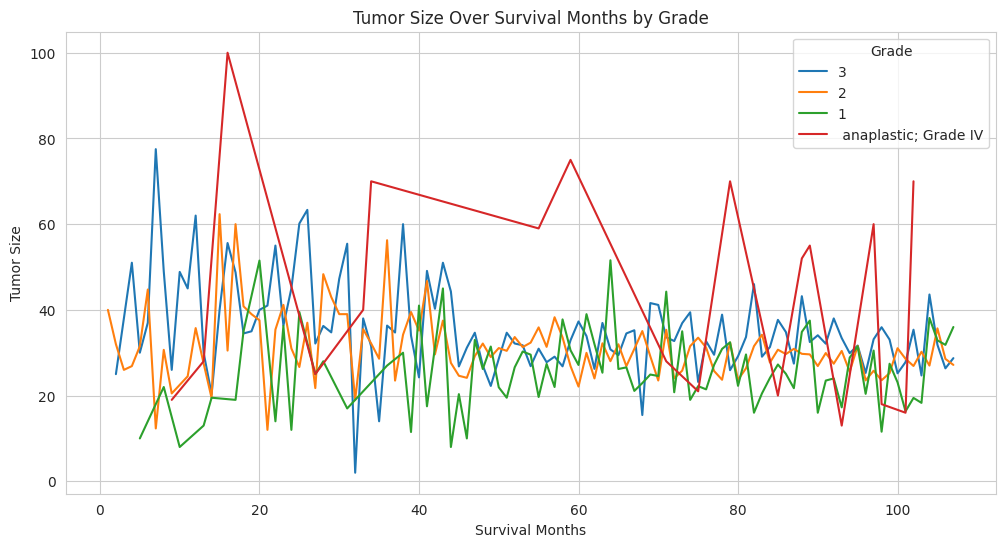

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Survival Months', y='Tumor Size', hue='Grade', ci=None)
plt.title('Tumor Size Over Survival Months by Grade')
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.legend(title='Grade')
plt.show()
